# Travel Destination Recommendation System Notebook

#### Authors
* 1
* 2 
* 3
* 4
* 5
* 6


## Problem Statement

The goal is to build a machine learning model that can predict hotel ratings based on customer reviews, budget, specific locations, and the type of residence. The dataset is scraped from TripAdvisor and it contains information about various hotels, including their ratings, reviews, amenities, pricing, geographical coordinates, and residence types (e.g., hotel, bed and breakfast, specialty lodging). By analyzing the text reviews along with these additional factors, the objective is to develop a model that can accurately predict the ratings of new, unseen hotels based on customer reviews, budget constraints, location preferences, and residence type.

Approach:

Data Preprocessing: Clean and preprocess the text reviews by removing stopwords, punctuation, and performing tokenization. Convert the text data into a numerical representation suitable for modeling. Handle missing values, if any, in the budget, location, and residence type columns.

Feature Engineering: Extract additional features from the dataset, such as review sentiment scores, review length, and any other relevant information. Engineer new features related to budget, location, and residence type, such as price range categories, geographical distance from landmarks, and one-hot encoding of residence types.

Model Selection: Experiment with different supervised learning models, such as linear regression, decision trees, random forests, or neural networks, to find the best model for predicting hotel ratings considering customer reviews, budget, location, and residence type. Evaluate the models using appropriate evaluation metrics like mean squared error (MSE) or mean absolute error (MAE).

Model Training and Evaluation: Split the dataset into training and testing sets. Train the selected model on the training set and evaluate its performance on the testing set. Fine-tune the model parameters to improve its accuracy. Perform cross-validation to assess the model's generalization capabilities.

## Objectives

## Data Understanding

In [1]:
# Importing necessary libraries
import pandas as pd
import json
import glob
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
#func to read json files
def read_json_files(json_files):
    dfs = []
    for file in json_files:
        with open(file) as f:
            json_data = json.load(f)
            df = pd.DataFrame(json_data)
            dfs.append(df)

    merged_df = pd.concat(dfs, ignore_index=True)
    return merged_df


In [3]:
json_files = ['..\Data\drc.json','..\Data\egypt.json', '..\Data\ethiopia.json',
                '..\Data\kenya.json', '..\Data\Madagascar.json', '..\Data\morocco.json',
                r'..\Data\nigeria.json', r'..\Data\rwanda.json', '..\Data\seychelles.json',
                r'..\Data\tanzania.json', r'..\Data\uganda.json', r'..\Data\namibia.json',
                '..\Data\south_africa.json', '..\Data\malawi.json', '..\Data\Senegal.json',
                '..\Data\zambia.json', '..\Data\Ghana.json', '..\Data\Botswana.json',
                '..\Data\capeverde.json' ]
df = read_json_files(json_files)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35836 entries, 0 to 35835
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     35836 non-null  object 
 1   type                   35836 non-null  object 
 2   category               35836 non-null  object 
 3   subcategories          34497 non-null  object 
 4   name                   35836 non-null  object 
 5   locationString         34497 non-null  object 
 6   description            20129 non-null  object 
 7   image                  28495 non-null  object 
 8   photoCount             35836 non-null  int64  
 9   awards                 34497 non-null  object 
 10  rankingPosition        26570 non-null  float64
 11  rating                 26706 non-null  float64
 12  rawRanking             26570 non-null  float64
 13  phone                  24666 non-null  object 
 14  address                34494 non-null  object 
 15  ad

## data cleaning

In [5]:
# replacing ratings column missing values with 0 
df['rating'].fillna(0, inplace=True)

## EDA and Data Munging

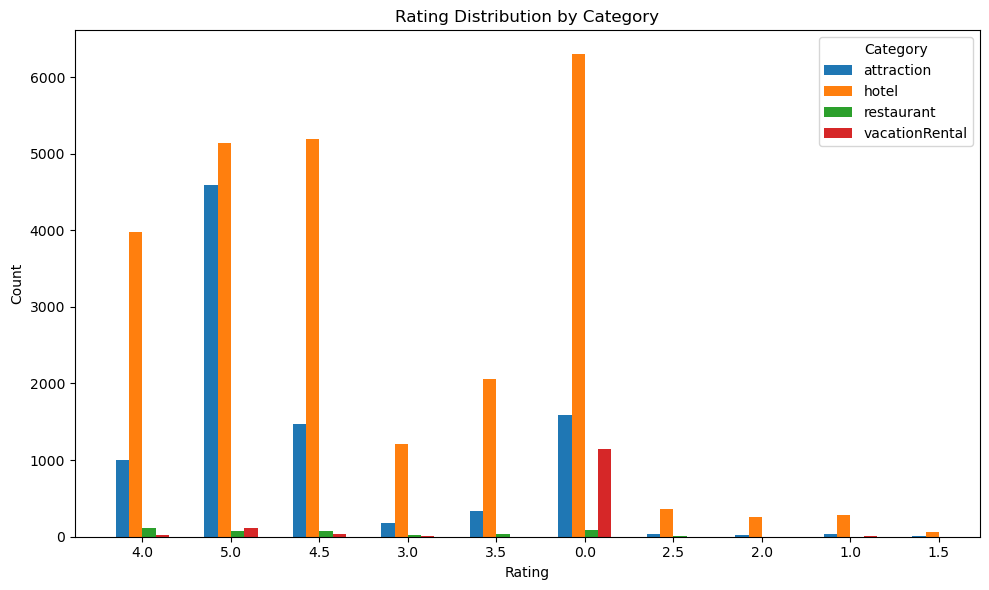

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Group the ratings by category
grouped_data = df.groupby('category')['rating'].value_counts().unstack()
# Get unique categories and ratings
categories = df['category'].unique()
ratings = df['rating'].unique()
# Reindex the grouped_data DataFrame
grouped_data = grouped_data.reindex(columns=ratings)
# Set the width of each bar
bar_width = 0.15
# Calculate the x position for each group of bars
x = np.arange(len(ratings))
# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
# Plot the bars for each category within each rating
for i, category in enumerate(categories):
    ax.bar(x + (i * bar_width), grouped_data.loc[category], width=bar_width, label=category)
# Set the x-axis labels and ticks
ax.set_xticks(x + ((len(categories) - 1) * bar_width) / 2)
ax.set_xticklabels(ratings)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Rating Distribution by Category')
ax.legend(title='Category', loc='upper right')  # Set legend location to 'upper right'
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()


* from the chart above it can be seen that `hotel` category had higher ratings with an average rate of `4.0` followed by `attraction` while restaurants had lowest ratings based on categories over `3.5` 
* Despite having good ratings the same too were rated poorly by customers hith `hotel` and `attraction` leading with rates of `1.5, 1.0` and `2.0` respectively. 

## Modelling

## Model Evaluation

## Tuning

## Deployment

## Conclusion and Recommendations